In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
matplotlib.rc('font', family='NanumGothicCoding')

In [4]:
df_fitness = pd.read_csv("./data/FITNESS-원본.csv", encoding='949')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [5]:
df_currency = pd.read_csv("./data/환율.csv", encoding='949')
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,20160101,181.48,0.1541
1,JPY,20160101,976.99,0.8294
2,USD,20160101,1178.00,1.0000
3,CNY,20160102,181.48,0.1541
4,JPY,20160102,976.99,0.8294


## bar-chart

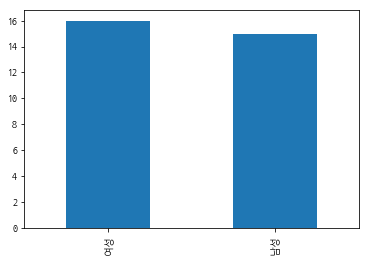

In [6]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

> 여성과 남성의 수는 거의 비슷하며 여성이 쪼금 더 많다.

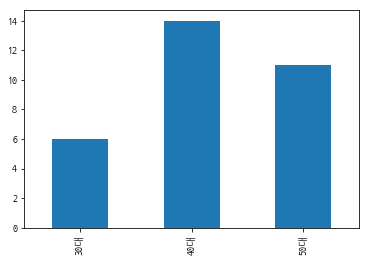

In [7]:
df_count = df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace=True)
df_count.plot.bar()

> 표본 사람들의 나이대는 30대 ~ 50대이고 40대, 50대, 30대 순으로 많이 존재한다

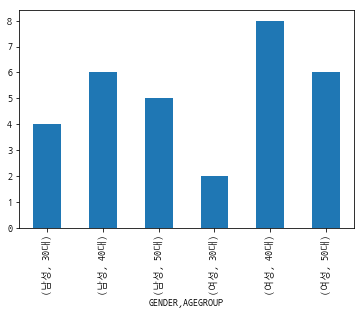

In [8]:
df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index=False).size()
df_groupby_total.plot.bar()

> 남성별 나이대 3개, 여성별 나이대 3개씩 분포하고 있는데, `40대 여성`이 가장 많이 존재한다.

## Histogram

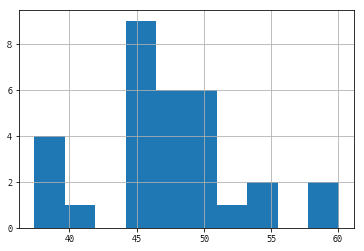

In [9]:
df_fitness['OXY'].hist()

> 산소량(OXY)에 대한 막대그래프를 보여준다, 또한 데이터 섬을 보여준다

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc653e7df60>,
      dtype=object)

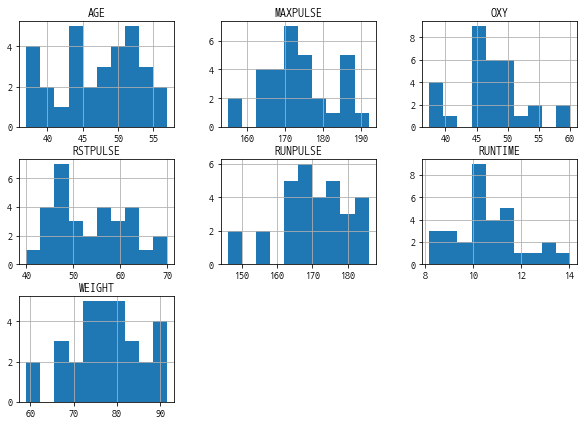

In [10]:
df_fitness.hist(figsize=(10,7))

> 산소량과 다른 컬럼(설명변수)들의 상관관계를 파악

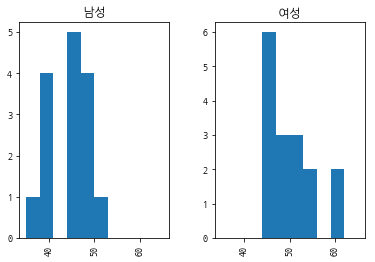

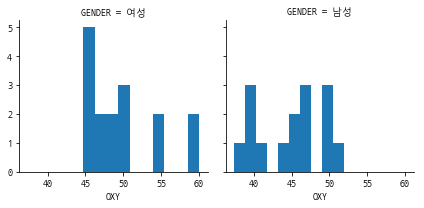

In [11]:
df_fitness.hist(column="OXY", by="GENDER", range=(35,65))
grid = sns.FacetGrid(df_fitness, col="GENDER")
grid.map(plt.hist, "OXY")

> 여성의 나이대가 50 ~ 60대로 나이가 더 많고, 남성의 나이대는 40~50대로 확인된다.
> 남성의 산소량이 더 적다

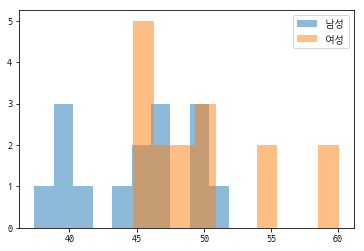

In [12]:
plt.hist(df_fitness[df_fitness["GENDER"] == "남성"]["OXY"],label = "남성", alpha = 0.5)
plt.hist(df_fitness[df_fitness["GENDER"] == "여성"]["OXY"],label = "여성", alpha = 0.5)
plt.legend()

> 남성과 여성의 나이에 따른 산소량을 보았을 때, 여성은 나이가 많을 수록 산소량이 낮은편이나
> 보편적으로 남성은 상대적으로 젊음에도 산소량이 낮은 것을 확인할 수 있다.

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

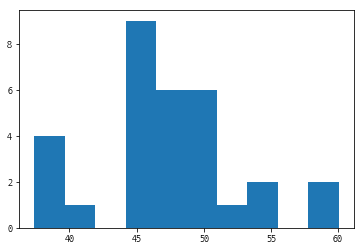

In [13]:
plt.hist(x="OXY", data=df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

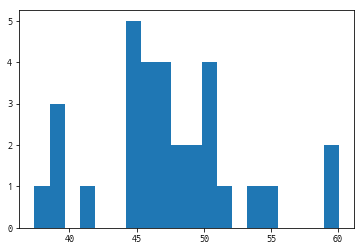

In [14]:
plt.hist(x="OXY", data=df_fitness, bins=20)

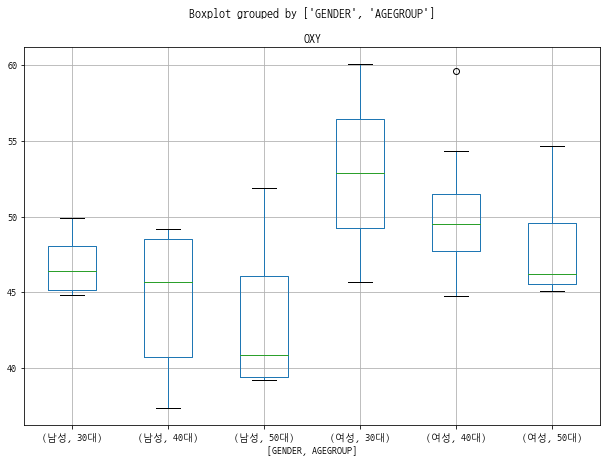

In [15]:
df_fitness.boxplot(column = "OXY", by = ["GENDER", "AGEGROUP"], figsize=(10,7))

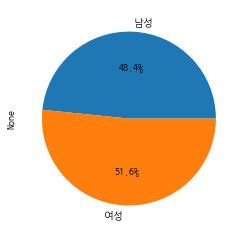

In [16]:
df_count = df_fitness.groupby(["GENDER"]).size()
df_count.plot.pie(y="OXY", autopct = "%.1f%%")

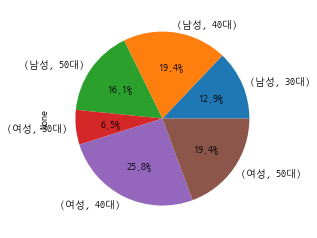

In [17]:
df_count = df_fitness.groupby(['GENDER','AGEGROUP']).size()
df_count.plot.pie(y = "OXY", autopct = "%.1f%%")

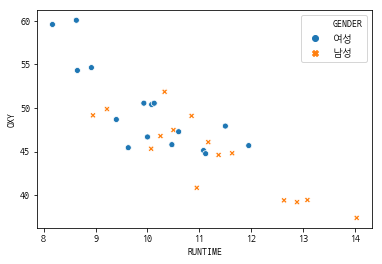

In [24]:
sns.scatterplot(x = "RUNTIME", y = "OXY", hue = "GENDER", style = "GENDER", data = df_fitness)

In [27]:
df_fitness = pd.read_csv("./data/FITNESS.csv", encoding='949')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


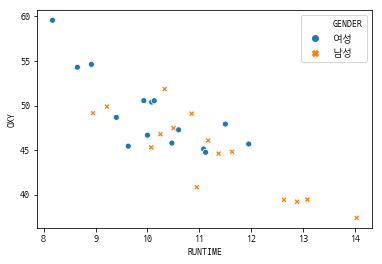

In [28]:
sns.scatterplot(x = "RUNTIME", y = "OXY", hue = "GENDER", style = "GENDER", data = df_fitness)

> 산소량은 남녀 모두 시간에 반비례한다

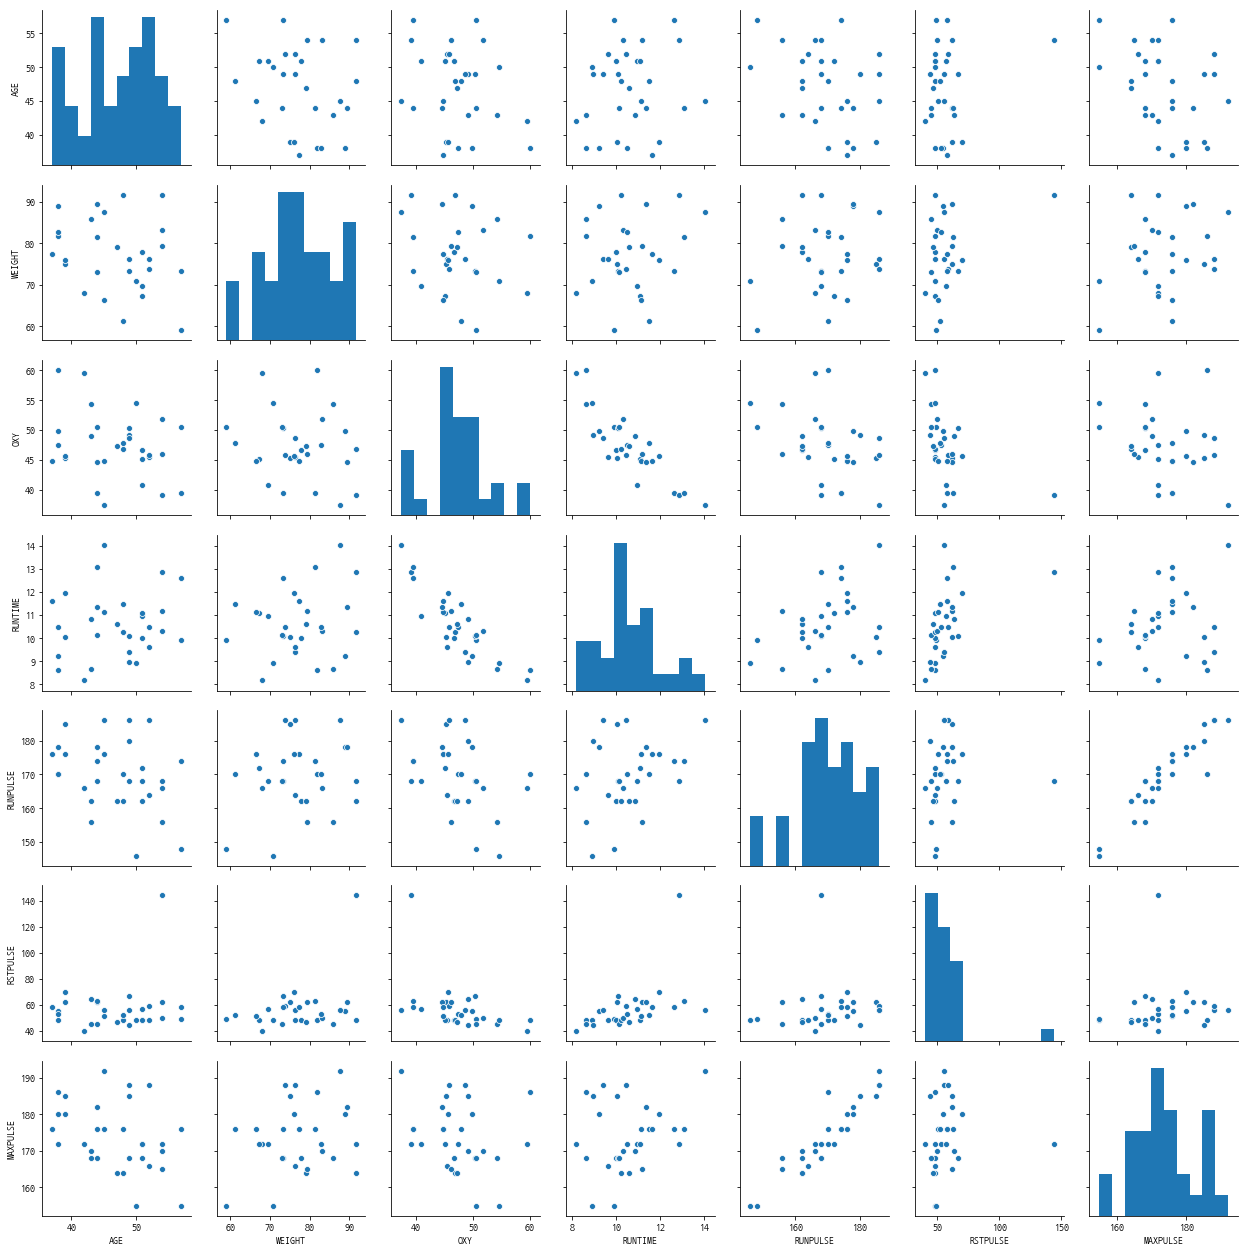

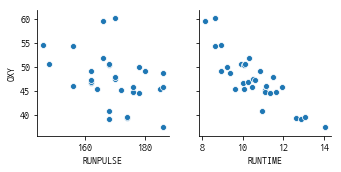

In [30]:
sns.pairplot(df_fitness)
sns.pairplot(df_fitness, y_vars = ["OXY"], x_vars = ["RUNPULSE", "RUNTIME"])

> 굳

In [39]:
df_currency = pd.read_csv("./data/환율.csv", encoding='949', parse_dates = ["APPL_DATE"])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [40]:
df_currency_pivot = df_currency.pivot(index = "APPL_DATE", columns = "CURRENCY", values = "STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


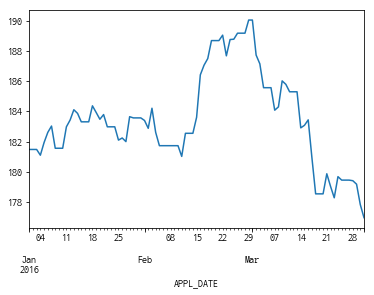

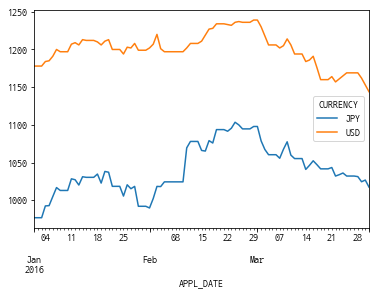

In [41]:
df_currency_pivot["CNY"].plot()
df_currency_pivot[["JPY", "USD"]].plot()

> 둘이 같이 그리면 위엔화가 변동이 안보인다, 시계열같은 것을 살펴볼 때에는 조심해야한다

## Heatmap

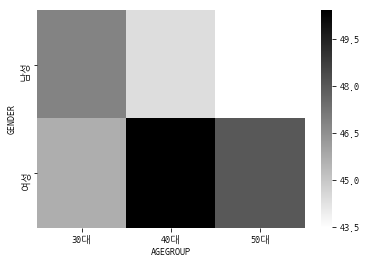

In [55]:
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
sns.heatmap(df_pivot, cmap = "gray_r")
# twilight, twilight_r, twilight_shifted, twilight_shifted_r, 

> 힛맵으로 그려보니, 2개의 컬럼(젠더, 나이대) 별로 산소량의 밀집도를 파악가능

## Contour Plot

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'shad'
  s)


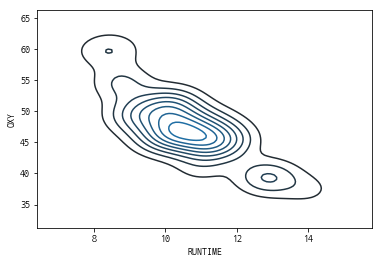

In [58]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shad = False)

## Parallel Plot

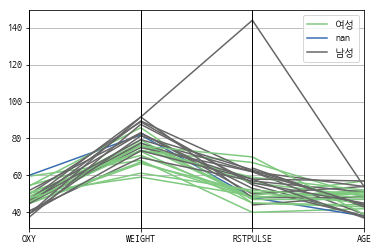

In [61]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols = ["OXY", "WEIGHT", "RSTPULSE","AGE"], colormap = "Accent")


> 남자 데이터에 이상치가 존재하고, 빈축값이 존재하는 것을 확인했다.
> 

In [62]:
df_count = df_fitness["AGEGROUP"].value_counts()
fit, axes = plt.subplots(nows=2, ncols=2, figsize = (13,10))
plt.tight_layout(w_pad = 5, h_pad = 5)

TypeError: __init__() got an unexpected keyword argument 'nows'